In [2]:
# Part 1: Data Preparation and Exploration

In [3]:
# Import Library

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the dataset

In [6]:
data = pd.read_csv('exchange_rate.csv')

In [7]:
# View Data

In [8]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [9]:
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y %H:%M')
data.set_index('date', inplace=True)
print(data)

             Ex_rate
date                
1990-01-01  0.785500
1990-01-02  0.781800
1990-01-03  0.786700
1990-01-04  0.786000
1990-01-05  0.784900
...              ...
2010-10-06  0.718494
2010-10-07  0.721839
2010-10-08  0.723197
2010-10-09  0.720825
2010-10-10  0.720825

[7588 rows x 1 columns]


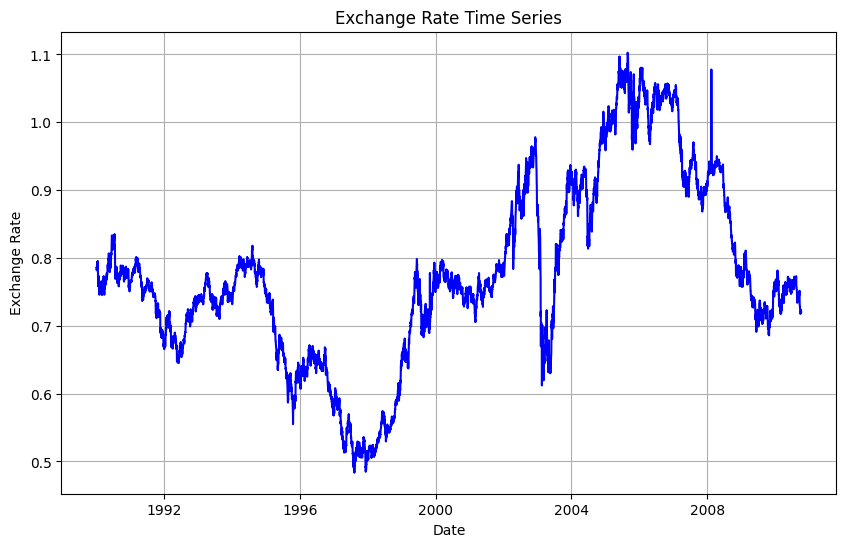

Missing Values:
 Ex_rate    0
dtype: int64


In [10]:
# Initial Exploration
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], color='blue')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# Data Preprocessing
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

In [11]:
# Part 2: Model Building - ARIMA

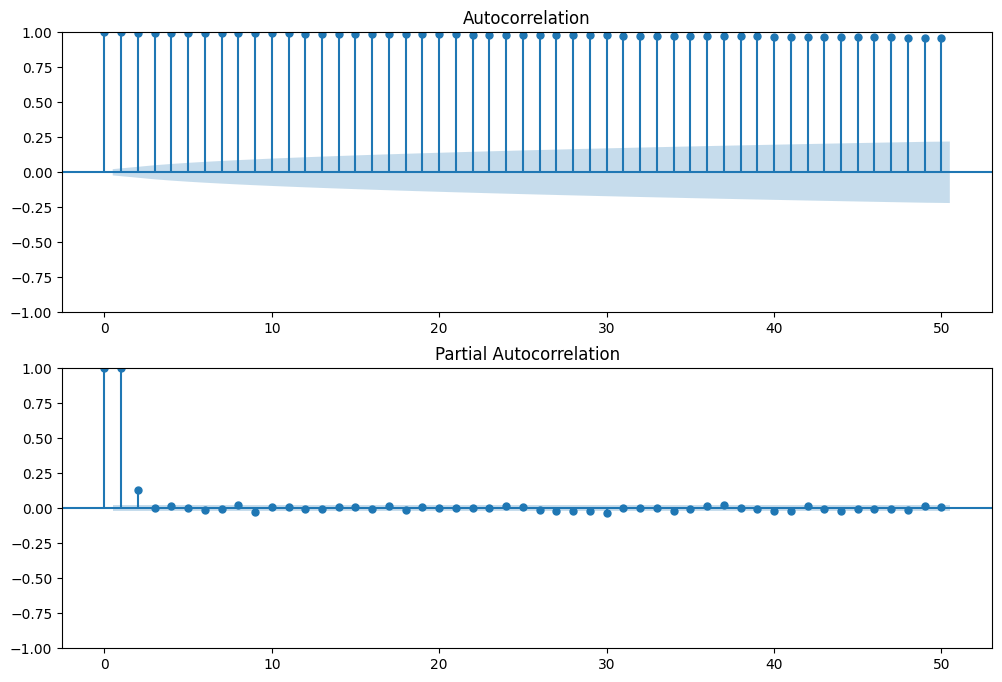

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data['Ex_rate'], lags=50, ax=ax1)
plot_pacf(data['Ex_rate'], lags=50, ax=ax2)
plt.show()


In [13]:
# 3.	Model Fitting

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with selected parameters
p = 2
d = 1
q = 1
arima_model = ARIMA(data['Ex_rate'], order=(p, d, q))

# Fit the ARIMA model
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.157
Date:                Sun, 02 Jun 2024   AIC                         -56100.315
Time:                        12:32:13   BIC                         -56072.578
Sample:                    01-01-1990   HQIC                        -56090.796
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.001    -60.736      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.422      0.155      -0.003       0.020
ma.L1         -0.0661      0.001    -59.596      0.0

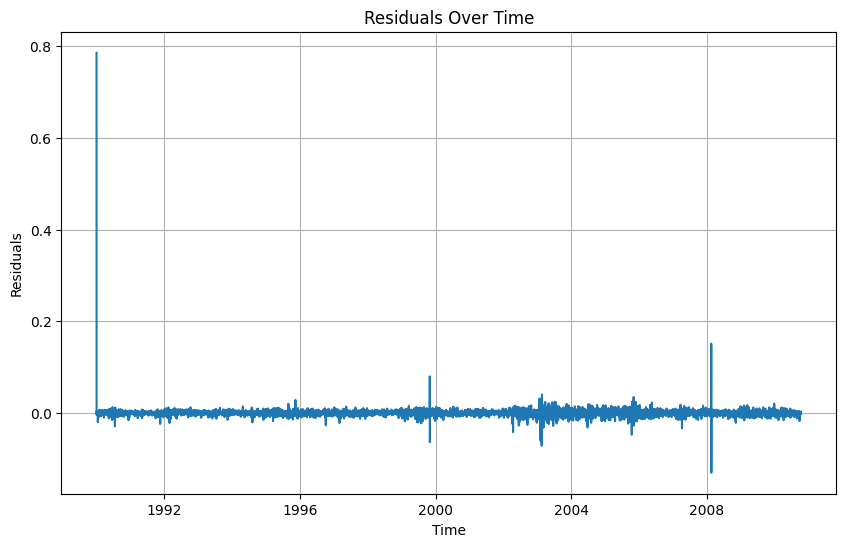

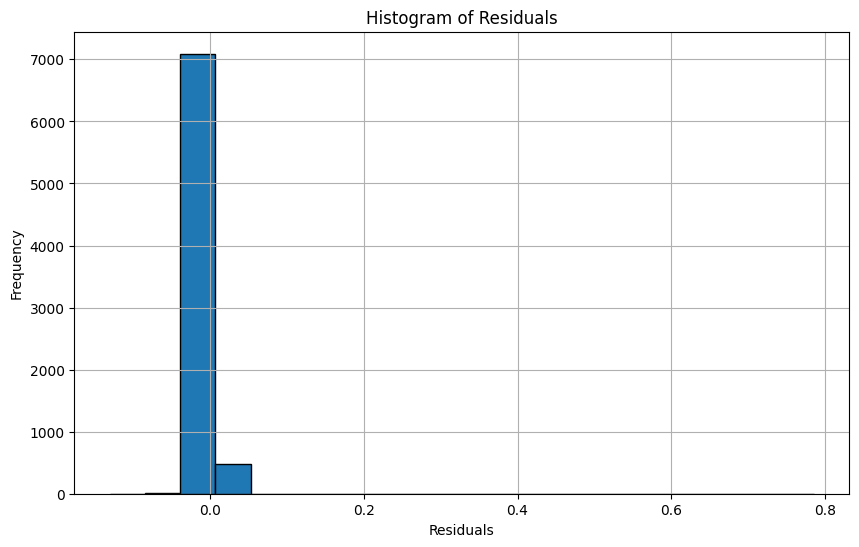

<Figure size 1000x600 with 0 Axes>

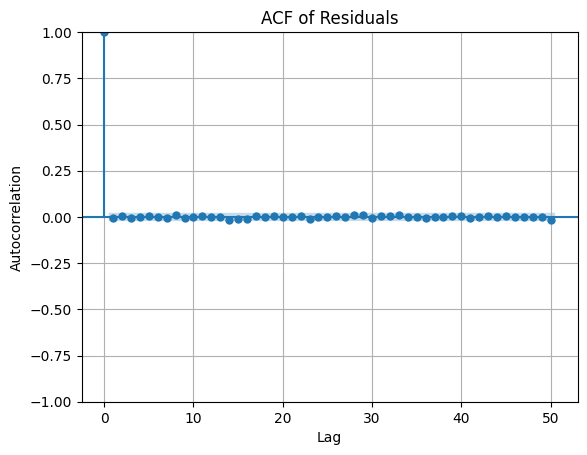

In [16]:
residuals = arima_result.resid

# Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50)
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


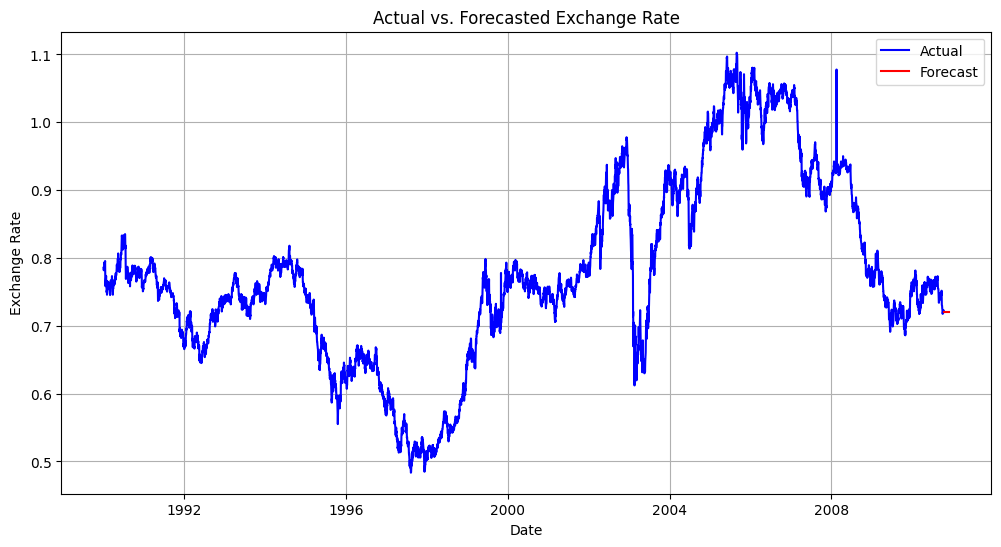

In [17]:
# Perform out-of-sample forecasting
forecast_steps = 50  # Number of steps to forecast
forecast = arima_result.forecast(steps=forecast_steps)

# Create index for the forecast period
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq=data.index.freq)[-forecast_steps:]

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Part 3: Model Building - Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Best Model: Simple (MSE: 0.0004)


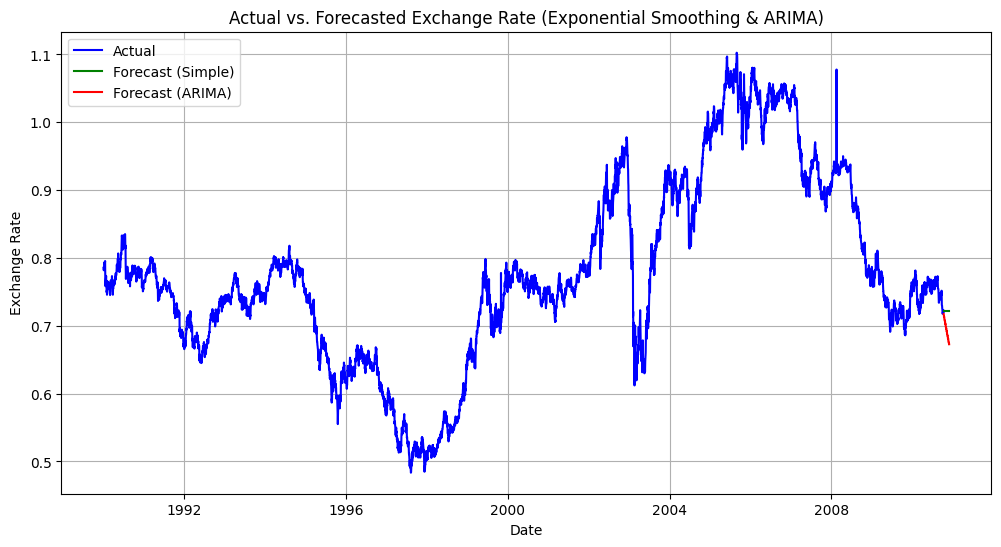

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

models = [
    ("Simple", SimpleExpSmoothing),
    ("Holt's Linear", ExponentialSmoothing),
    ("Holt-Winters", ExponentialSmoothing)
]

# Parameter Optimization
best_model = None
best_mse = float("inf")

for name, model_class in models:
    if name == "Simple":
        model = model_class(data['Ex_rate']).fit(smoothing_level=0.2)  # Initial guess
    elif name == "Holt's Linear":
        model = model_class(data['Ex_rate'], trend="add").fit(smoothing_level=0.2, smoothing_trend=0.1)
    else:  # Holt-Winters
        model = model_class(data['Ex_rate'], trend="add", seasonal="add", seasonal_periods=12).fit(
            smoothing_level=0.2, smoothing_trend=0.1, smoothing_seasonal=0.1
        )

    forecast = model.forecast(steps=forecast_steps)
    mse = mean_squared_error(data['Ex_rate'][-forecast_steps:], forecast)

    if mse < best_mse:
        best_model = model
        best_mse = mse
        best_model_name = name

print(f"\nBest Model: {best_model_name} (MSE: {best_mse:.4f})")

# Model Fitting and Forecasting
forecast_values = best_model.forecast(steps=forecast_steps)

# Compare Forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast_index, forecast_values, label=f'Forecast ({best_model_name})', color='green')
plt.plot(forecast_index, forecast, label='Forecast (ARIMA)', color='red')  # Previous ARIMA forecast
plt.title('Actual vs. Forecasted Exchange Rate (Exponential Smoothing & ARIMA)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Part 4: Evaluation and Comparison

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Evaluate Forecasts
def evaluate_forecast(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"\n{model_name} Metrics:")
    print(f"- MAE: {mae:.4f}")
    print(f"- RMSE: {rmse:.4f}")
    print(f"- MAPE: {mape:.2f}%")

actual_values = data['Ex_rate'][-forecast_steps:]  # Actual values for forecast period
evaluate_forecast(actual_values, forecast_values, best_model_name)  # Exponential Smoothing
evaluate_forecast(actual_values, forecast, "ARIMA")

# Model Comparison (Discussion)
print("\nModel Comparison:")
if best_mse < mean_squared_error(actual_values, forecast):
    print("- The best exponential smoothing model outperformed ARIMA in terms of MSE.")
else:
    print("- ARIMA performed better than the best exponential smoothing model in terms of MSE.")

print(
    "- Exponential smoothing models are often preferred for their simplicity and ability to capture trends and seasonality."
)
print("- ARIMA models can be more complex but can handle a wider range of time series patterns.")
print("- The best model choice depends on the specific time series and the desired balance between simplicity and complexity.")

# Conclusion
print("\nConclusion:")
print(
    "- In this analysis, we explored both ARIMA and exponential smoothing models for forecasting exchange rates."
)
print(
    f"- The best model was {best_model_name} with an MSE of {best_mse:.4f}, but ARIMA might be preferred in certain scenarios."
)
print(
    "- It's crucial to carefully evaluate and compare multiple models to select the most suitable one for your specific forecasting needs."
)



Simple Metrics:
- MAE: 0.0161
- RMSE: 0.0191
- MAPE: 0.02%

ARIMA Metrics:
- MAE: 0.0426
- RMSE: 0.0435
- MAPE: 0.06%

Model Comparison:
- The best exponential smoothing model outperformed ARIMA in terms of MSE.
- Exponential smoothing models are often preferred for their simplicity and ability to capture trends and seasonality.
- ARIMA models can be more complex but can handle a wider range of time series patterns.
- The best model choice depends on the specific time series and the desired balance between simplicity and complexity.

Conclusion:
- In this analysis, we explored both ARIMA and exponential smoothing models for forecasting exchange rates.
- The best model was Simple with an MSE of 0.0004, but ARIMA might be preferred in certain scenarios.
- It's crucial to carefully evaluate and compare multiple models to select the most suitable one for your specific forecasting needs.
